In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [4]:
survey = pd.read_csv("C:/Users/garci/Desktop/Data analytics/Analisis/Salud mental tecnologia/2014/survey.csv")
survey2016 = pd.read_csv("C:/Users/garci/Desktop/Data analytics/Analisis/Salud mental tecnologia/2016/mental-heath-in-tech-2016_20161114.csv")

In [5]:
survey.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
print(survey.keys())

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


In [7]:
len(survey)

1259

In [8]:
survey.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [9]:
#Limpiamos la columna de state, ya que queremos realizar el estudio a nivel global
survey = survey.drop(columns=['state'])

In [10]:
#Limpiamos los valores NA de la columna self_employed
survey = survey.dropna(subset=['self_employed'])

In [11]:
#Vemos cuantas veces aparece cada valor en work_interfere
survey['work_interfere'].value_counts(dropna=True)

work_interfere
Sometimes    458
Never        207
Rarely       170
Often        142
Name: count, dtype: int64

In [12]:
#Vemos el porcentaje de cada categoria
survey['work_interfere'].value_counts(normalize=True)


work_interfere
Sometimes    0.468782
Never        0.211873
Rarely       0.174002
Often        0.145343
Name: proportion, dtype: float64

In [13]:
survey = survey.dropna(subset=['work_interfere'])

In [14]:
#Comprobamos los datos de genero para limpiarlos
survey['Gender'].value_counts(dropna=True)

Gender
Male                                              471
male                                              156
Female                                            103
M                                                  85
female                                             51
F                                                  31
m                                                  23
f                                                  13
Make                                                4
Male                                                3
Cis Male                                            2
Female (trans)                                      2
Female                                              2
Cis Female                                          1
Male-ish                                            1
Trans-female                                        1
woman                                               1
Nah                                                 1
non-binary           

In [15]:
#pasamos todos los valores a minusculas y eliminamos cualquier espacion que puedan tener
survey['Gender'] = survey['Gender'].str.lower().str.strip()

In [16]:
survey['Gender'] = survey['Gender'].replace({
    'm' : 'male',
    'm' : 'male',
    'f' : 'female',
    'f' : 'female'
})

In [17]:
#Modificamos todos aquellos registros que no sean female o male por 'otros'
#survey['Gender'].mask(~survey['Gender'].isin(['female','male']),'others',inplace=True)
survey['Gender'] = survey['Gender'].mask(~survey['Gender'].isin(['female', 'male']), 'others')

In [18]:
##Nos guardamos todos los valores de edad fuera de rango para limpiar el dataset
survey['CleanedAge'] = survey['Age'].where((survey['Age'] > 16) & (survey['Age'] < 120))

In [19]:
survey = survey.drop(columns = 'Age')

In [20]:
#Limpiamos nulos
survey = survey.dropna(subset=['CleanedAge'])

In [21]:
survey['Age'] = survey.loc[:,'CleanedAge'].astype(int)

In [22]:
survey = survey.drop(columns = 'CleanedAge')

In [47]:
#Creamos una columna para el rango de edades de los participantes
survey['GrupoEdad'] = pd.cut(survey['Age'],bins=[18,25,35,45,60,float('inf')],labels=['18-25','26-35','36-45','46-60','+60'],right=False)

In [23]:
survey.to_excel("C:/Users/garci/Desktop/Data analytics/Analisis/Salud mental tecnologia/2014/cleanedDataset.xlsx")

In [24]:
print(survey.describe())
print(survey.info())
print(survey.shape)

              Age
count  971.000000
mean    32.306900
std      7.396749
min     18.000000
25%     27.000000
50%     31.000000
75%     36.000000
max     72.000000
<class 'pandas.core.frame.DataFrame'>
Index: 971 entries, 18 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  971 non-null    object
 1   Gender                     971 non-null    object
 2   Country                    971 non-null    object
 3   self_employed              971 non-null    object
 4   family_history             971 non-null    object
 5   treatment                  971 non-null    object
 6   work_interfere             971 non-null    object
 7   no_employees               971 non-null    object
 8   remote_work                971 non-null    object
 9   tech_company               971 non-null    object
 10  benefits                   971 non-null    object
 11  care_options    

In [25]:
survey = survey.drop(columns='Timestamp')
survey = survey.drop(columns='comments')

In [34]:
#Listamos los valores unicos de cada columna
for column in survey.select_dtypes(include=['object','category']).columns:
    print(column)
    print(survey[column].unique())
    print()

Gender
['male' 'female' 'others']

Country
['United States' 'United Kingdom' 'Canada' 'Netherlands' 'Poland'
 'Australia' 'France' 'Germany' 'Mexico' 'Brazil' 'Slovenia' 'Ireland'
 'India' 'South Africa' 'Russia' 'Italy' 'Colombia' 'Portugal'
 'Switzerland' 'Belgium' 'Sweden' 'New Zealand' 'Finland' 'Israel'
 'Bosnia and Herzegovina' 'Austria' 'Hungary' 'Singapore' 'Japan'
 'Bulgaria' 'Croatia' 'Thailand' 'Denmark' 'Moldova' 'Georgia' 'China'
 'Czech Republic' 'Philippines']

self_employed
['Yes' 'No']

family_history
['Yes' 'No']

treatment
['No' 'Yes']

work_interfere
['Sometimes' 'Never' 'Often' 'Rarely']

no_employees
['1-5' '100-500' '26-100' 'More than 1000' '6-25' '500-1000']

remote_work
['Yes' 'No']

tech_company
['Yes' 'No']

benefits
['Yes' 'No' "Don't know"]

care_options
['Not sure' 'Yes' 'No']

wellness_program
['Yes' 'No' "Don't know"]

seek_help
["Don't know" 'No' 'Yes']

anonymity
['Yes' 'No' "Don't know"]

leave
['Very easy' 'Somewhat difficult' "Don't know" 'Very dif

<Axes: xlabel='Gender', ylabel='count'>

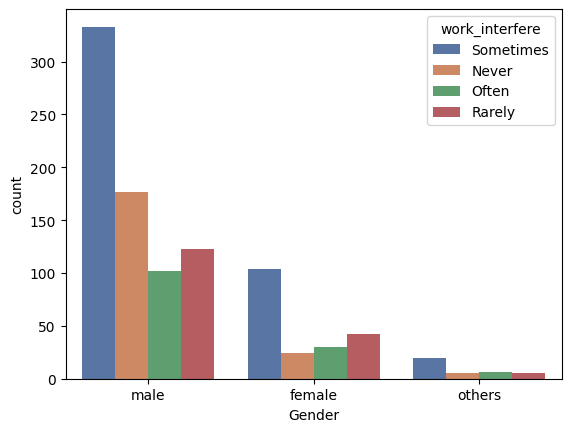

In [42]:
#y = survey['work_interfere']
#barra1 = survey

sns.countplot(survey, x="Gender", hue="work_interfere",palette="deep")

<Axes: xlabel='GrupoEdad', ylabel='count'>

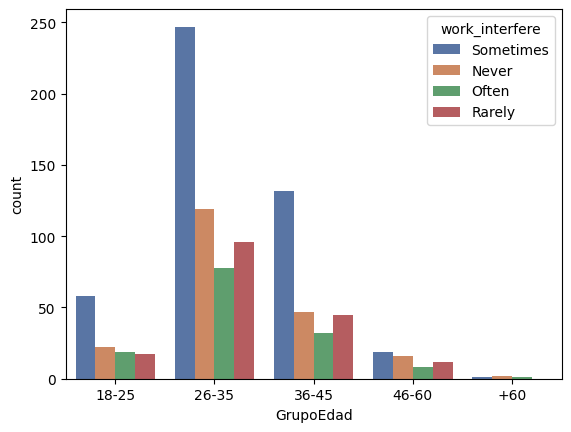

In [48]:
sns.countplot(survey, x="GrupoEdad", hue="work_interfere",palette="deep")

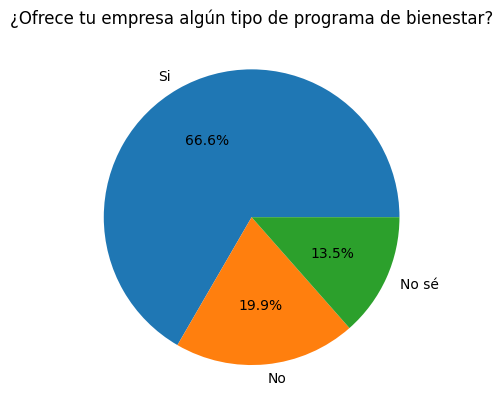

In [68]:
y = survey['wellness_program'].value_counts()
labels = ['Si', 'No', "No sé"]
plt.pie(y, labels=labels, autopct='%1.1f%%')
plt.title("¿Ofrece tu empresa algún tipo de programa de bienestar?")
plt.show() 

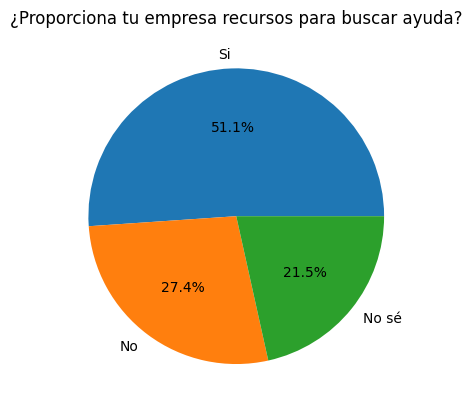

In [69]:
y = survey['seek_help'].value_counts()
labels = ['Si', 'No', "No sé"]
plt.pie(y, labels=labels, autopct='%1.1f%%')
plt.title("¿Proporciona tu empresa recursos para buscar ayuda?")
plt.show() 

[Text(0, 0, '373'), Text(0, 0, '312'), Text(0, 0, '286')]

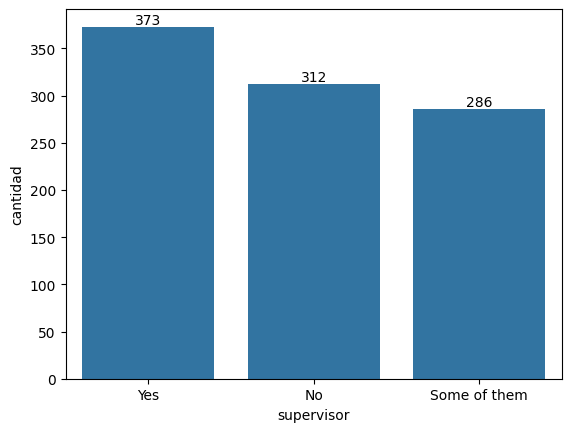

In [95]:
count_supervisor = survey['supervisor'].value_counts().reset_index()
count_supervisor.columns = ['supervisor','cantidad']
ax = sns.barplot(
    data = count_supervisor,
    x = 'supervisor',
    y = 'cantidad'
    
)
ax.bar_label(container)

In [87]:
count_supervisor

,supervisor,count
0,Yes,373
1,No,312
2,Some of them,286
